In [23]:
import pandas as pd
import numpy as np

%matplotlib inline

## Reading the HealthCare Dataset

### Q1 (3 Points): Load the Dataset
Load the healthcare dataset into a DataFrame.

In [24]:
data       = pd.read_csv("healthcare_dataset.csv")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55490 non-null  float64
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 6.4

In [26]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281310,328.0,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327290,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096080,205.0,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450.0,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317810,458.0,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417.0,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797310,316.0,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764720,347.0,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092360,321.0,Elective,2019-05-31,Ibuprofen,Abnormal


#### Also, we can use pandas.api.types.is_numeric_dtype to count the number of numerical and none-numerical variables 

In [27]:
from pandas.api.types import is_numeric_dtype
n=0
for c in data.columns:
    if is_numeric_dtype(data[c]): n+=1
print('numerical variables:', n, 'none-numerical variables:',len(data.columns)-n)

numerical variables: 3 none-numerical variables: 12


### Q2 (17 Points): Data Exploration

Answer the following questions based on the dataset:

Find the total number of observations (rows). (3 pts)

Find the total number of variables (columns). (3 pts)

Find the number of numerical and non-numerical variables. (6 pts)

Find if there are any columns with missing values. (5 pts)

In [28]:
# 1. Total number of observations
num_rows = data.shape[0]
print("Total number of observations (rows):", num_rows)

# 2. Total number of variables
num_columns = data.shape[1]
print("Total number of variables (columns):", num_columns)

# 3. Numerical and non-numerical variables
num_numerical = len(data.select_dtypes(include=['number']).columns)
num_non_numerical = len(data.select_dtypes(exclude=['number']).columns)
print("Number of numerical variables:", num_numerical)
print("Number of non-numerical variables:", num_non_numerical)

# 4. Columns with missing values
missing_values = data.isnull().sum().loc[lambda x: x > 0].count()
print("Number of columns with missing values:", missing_values)

Total number of observations (rows): 55500
Total number of variables (columns): 15
Number of numerical variables: 3
Number of non-numerical variables: 12
Number of columns with missing values: 1


## Q3 Preparing data for analytics (20 pts)

a. Handle rows with missing values (5 pts)

b. Rename the column heading from 'Doctor' to 'Doctor Name' (5 pts)

c. Create a new column 'Discharge Month' from the value in the column of 'Discharge Date' (5 pts)

d. Group the data of patients by their medical condition (5 pts)

In [29]:
#Handle rows with missing values (5 pts)
data.dropna(inplace=True)
data['Room Number'].isnull().sum()

np.int64(0)

In [31]:
# Rename the column heading from 'Doctor' to 'Doctor Name' (5 pts)
data.rename(columns={"Doctor": "Doctor Name"}, inplace=True)
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor Name,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281310,328.0,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327290,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096080,205.0,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450.0,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317810,458.0,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417.0,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797310,316.0,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764720,347.0,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092360,321.0,Elective,2019-05-31,Ibuprofen,Abnormal


In [33]:
# Convert the 'Discharge Date' column to datetime format (if not already done)
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'], errors='coerce')

# Create a new column 'Discharge Month' by extracting the month name
data['Discharge Month'] = data['Discharge Date'].dt.month_name()

# Display the updated DataFrame
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor Name,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Discharge Month
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328.0,Urgent,2024-02-02,Paracetamol,Normal,February
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive,August
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205.0,Emergency,2022-10-07,Aspirin,Normal,October
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450.0,Elective,2020-12-18,Ibuprofen,Abnormal,December
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,2022-10-09,Penicillin,Abnormal,October


In [34]:
# Group the data by 'Medical Condition'
grouped_data = data.groupby('Medical Condition')

# Display aggregated data, e.g., count of patients in each condition
grouped_summary = grouped_data.size().reset_index(name='Patient Count')

# Display the grouped summary
print(grouped_summary)

  Medical Condition  Patient Count
0         Arthritis           9306
1            Asthma           9185
2            Cancer           9227
3          Diabetes           9299
4      Hypertension           9244
5           Obesity           9229


### Q4 (25 Points): Demographics and Analysis

a: What is the average age of patients in the dataset? (5 pts)

b: Determine the gender distribution of the patients. How many are male, female, or other? (5 pts)

c: Which blood type is the most common in the dataset? (5 pts)

d: What is the average billing amount across all patients? (5 pts)

e: Identify the maximum and minimum billing amounts and the patients associated with these values. (5 pts)

In [32]:
average_age = data['Age'].mean()
print("The average age of patients is:", round(average_age, 2))


The average age of patients is: 51.54


In [33]:
gender_distribution = data['Gender'].value_counts()
print("Gender distribution:")
print(gender_distribution)


Gender distribution:
Gender
Male      27774
Female    27726
Name: count, dtype: int64


In [34]:
most_common_blood_type = data['Blood Type'].value_counts().idxmax()
print("The most common blood type is:", most_common_blood_type)


The most common blood type is: A-


In [35]:
average_billing = data['Billing Amount'].mean()
print("The average billing amount is:", round(average_billing, 2))


The average billing amount is: 25539.32


In [36]:
max_billing = data.loc[data['Billing Amount'].idxmax()]
min_billing = data.loc[data['Billing Amount'].idxmin()]

print("Patient with maximum billing amount:")
print(max_billing[['Name', 'Billing Amount']])

print("\nPatient with minimum billing amount:")
print(min_billing[['Name', 'Billing Amount']])

Patient with maximum billing amount:
Name              tOdd CARrILlO
Billing Amount     52764.276736
Name: 36349, dtype: object

Patient with minimum billing amount:
Name              james lUnA
Billing Amount   -2008.49214
Name: 47589, dtype: object


### Q5 (20 Points):  Medical Insights and Analysis

a: Which medical condition appears most frequently in the dataset? (5 pts)

b: Group the data by "Admission Type" and find the average billing amount for each group (5 pts)

c: Which doctor attended the highest number of patients? (5 pts)

d: Identify the hospital that handled the most patient admissions. (5 pts)

In [37]:
most_frequent_condition = data['Medical Condition'].value_counts().idxmax()
print("The most frequent medical condition is:", most_frequent_condition)


The most frequent medical condition is: Arthritis


In [38]:
average_billing_by_admission = data.groupby('Admission Type')['Billing Amount'].mean()
print("Average billing amount by admission type:")
print(average_billing_by_admission)


Average billing amount by admission type:
Admission Type
Elective     25602.226311
Emergency    25497.397157
Urgent       25517.364497
Name: Billing Amount, dtype: float64


In [39]:
most_frequent_doctor = data['Doctor'].value_counts().idxmax()
print("The doctor who attended the most patients is:", most_frequent_doctor)


The doctor who attended the most patients is: Michael Smith


In [40]:
most_frequent_hospital = data['Hospital'].value_counts().idxmax()
print("The hospital that handled the most admissions is:", most_frequent_hospital)


The hospital that handled the most admissions is: LLC Smith


### Q6  :  Data Visualization (30 points)

a:  Show the distribution of patients across different medical conditions. (5 pts)

b: Show the distribution of hospital admission types (e.g., Emergency, Urgent, Elective). (5 pts)

c: Plot the number of patients across different blood types. (5 pts)

d: Analyze the trend of billing amounts over admission years. (5 pts)

e: Compare the number of patients in the top 5 hospitals with the most admissions. (5 pts)

f: Show the number of patients treated by the top 5 most active doctors. (5 pts)

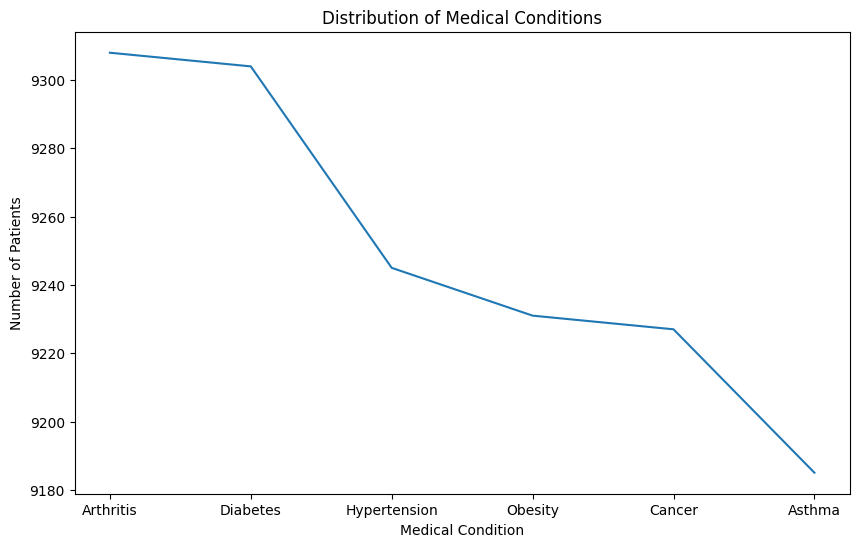

In [41]:
import matplotlib.pyplot as plt  

medical_condition_count = data['Medical Condition'].value_counts()
medical_condition_count.plot(kind='line', figsize=(10, 6), title='Distribution of Medical Conditions')
plt.ylabel('Number of Patients')
plt.show()

### Show the distribution of hospital admission types (e.g., Emergency, Urgent, Elective). (5 pts)

<Axes: title={'center': 'Hospital Admission Types Distribution'}, xlabel='Admission Type', ylabel='Number of Admissions'>

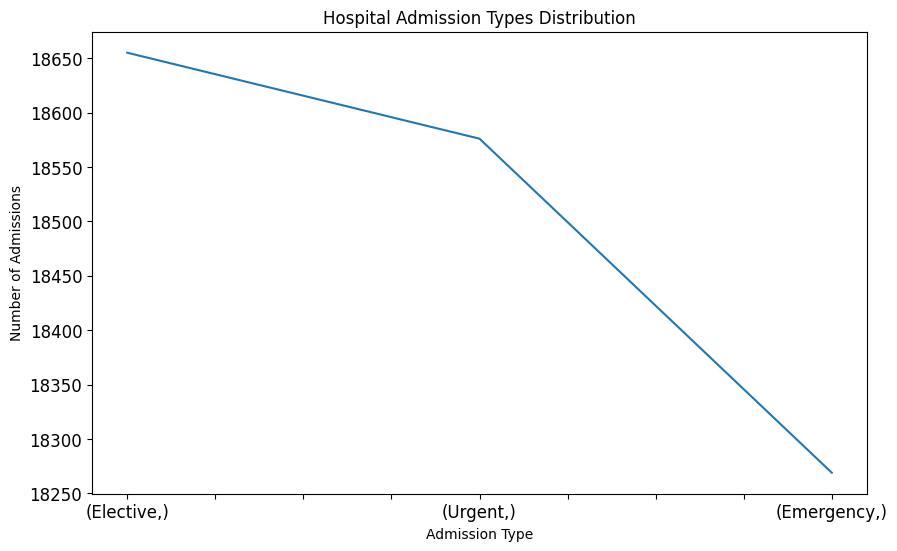

In [43]:
data[['Admission Type']].value_counts().plot(kind='line', figsize=(10, 6), fontsize=12, xlabel='Admission Type',
                                             ylabel='Number of Admissions', legend=False, title='Hospital Admission Types Distribution')


### Plot the number of patients across different blood types. (5 pts)

<Axes: title={'center': 'Patient Distribution by Blood Type'}, xlabel='Blood Type', ylabel='Number of Patients'>

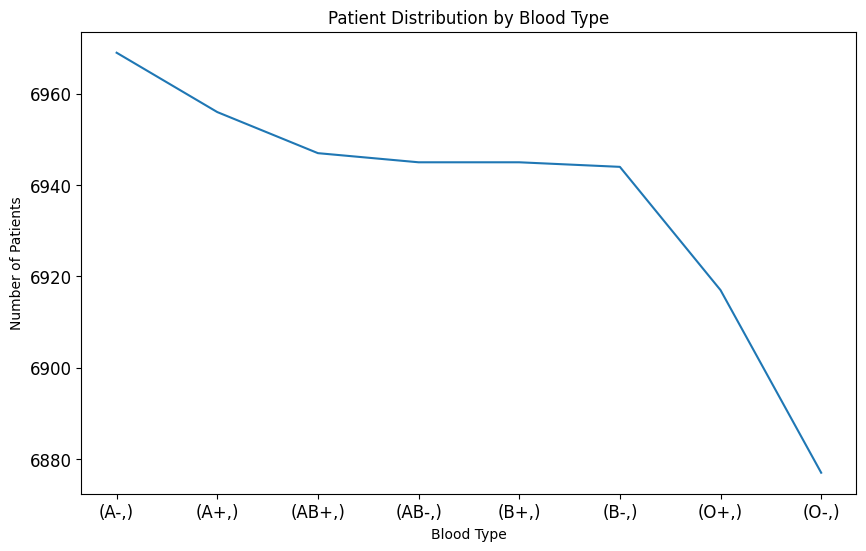

In [47]:
data[['Blood Type']].value_counts().plot(kind='line', figsize=(10, 6), fontsize=12, xlabel='Blood Type',
                                         ylabel='Number of Patients', legend=False, title='Patient Distribution by Blood Type')


### Analyze the trend of billing amounts over admission years. (5 pts)

<Axes: title={'center': 'Trend of Billing Amounts Over Years'}, xlabel='Year', ylabel='Average Billing Amount'>

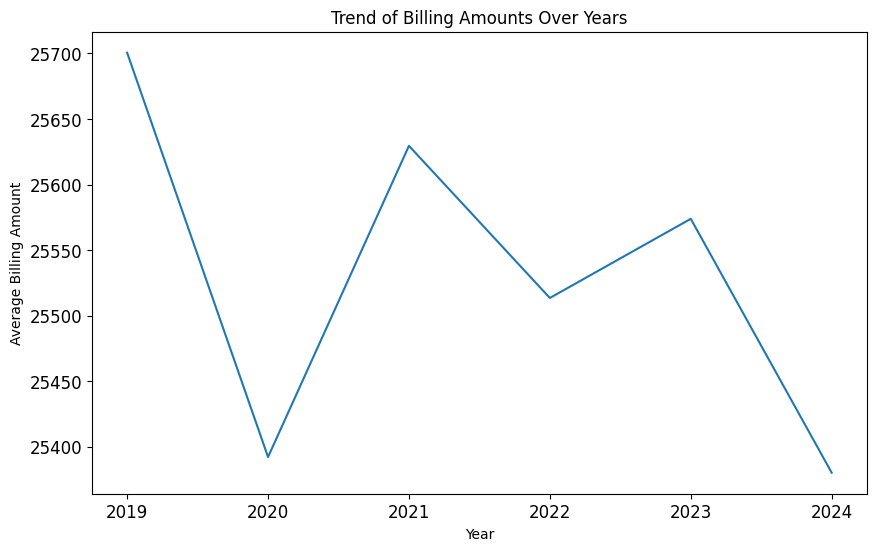

In [50]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data[['Date of Admission', 'Billing Amount']].groupby(data['Date of Admission'].dt.year).mean().plot(kind='line', figsize=(10, 6), 
    y='Billing Amount', fontsize=12, xlabel='Year', ylabel='Average Billing Amount', legend=False, title='Trend of Billing Amounts Over Years')


### Compare the number of patients in the top 5 hospitals with the most admissions. (5 pts)

<Axes: title={'center': 'Top 5 Hospitals by Admissions'}, xlabel='Hospital', ylabel='Number of Admissions'>

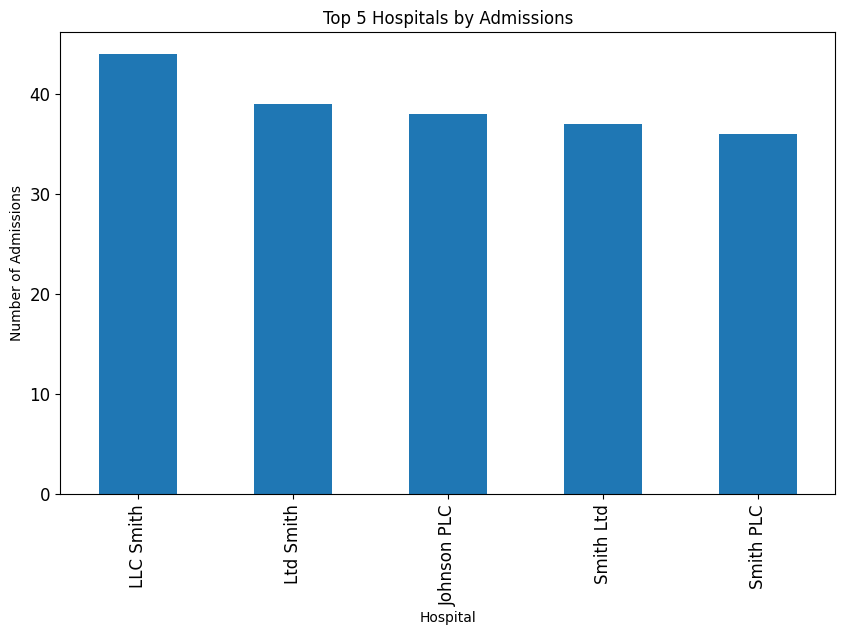

In [52]:
data['Hospital'].value_counts().head(5).plot(kind='bar', figsize=(10, 6), fontsize=12, xlabel='Hospital',
                                             ylabel='Number of Admissions', legend=False, title='Top 5 Hospitals by Admissions')


### Show the number of patients treated by the top 5 most active doctors. (5 pts)

<Axes: title={'center': 'Top 5 Most Active Doctors by Patients'}, xlabel='Doctor', ylabel='Number of Patients'>

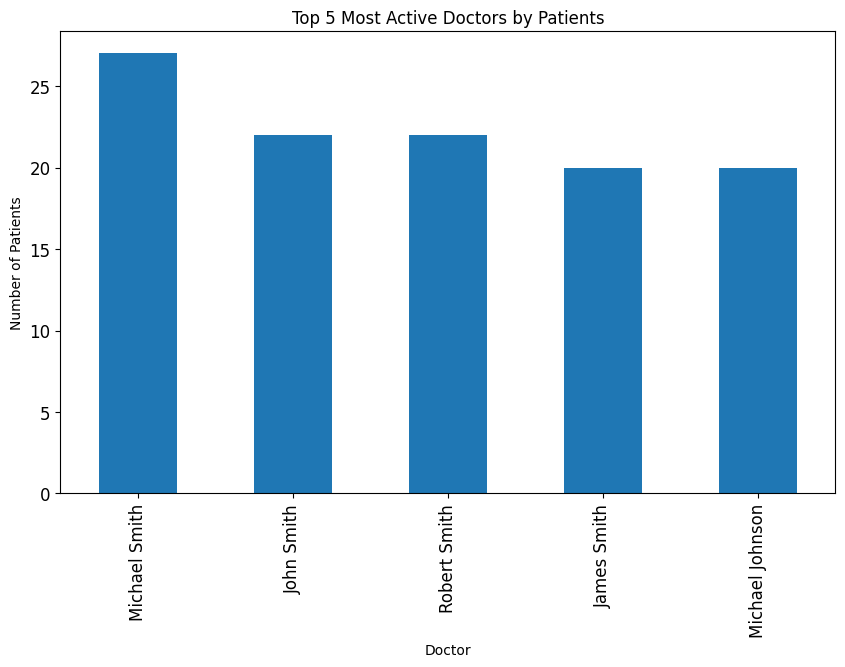

In [55]:
data['Doctor'].value_counts().head(5).plot(kind='bar', figsize=(10, 6), fontsize=12, xlabel='Doctor',
                                           ylabel='Number of Patients', legend=False, title='Top 5 Most Active Doctors by Patients')
